In [ ]:
--1.Count the number of records in the table
SELECT COUNT(*)
FROM myers_briggs_table;

--2.Inspect the dataset and study the fields
SELECT *
FROM myers_briggs_table
LIMIT 5;

--3.Making necessary edits. 
--Posture - ideal posture (A), kyphosis-lordosis (B), flat back (C), sway-back (D)
UPDATE myers_briggs_table
SET "Posture" = 
CASE WHEN "Posture" = 'A' THEN 'ideal posture'
WHEN "Posture" = 'B' THEN 'kyphosis-lordosis'
WHEN "Posture" = 'C' THEN 'flat back'
WHEN "Posture" = 'D' THEN 'sway-back'
END;

ALTER TABLE myers_briggs_table
ADD COLUMN "Age_grouping" VARCHAR

--Age grouping
UPDATE myers_briggs_table
SET "Age_grouping" =
CASE WHEN "Age" <18 THEN 'MINOR'
  WHEN "Age" BETWEEN 18 AND 25 THEN '18-25'
  WHEN "Age" BETWEEN 25 AND 30 THEN '25-30'
  WHEN "Age" > 30 THEN 'Over 30'
  END

--4.Rename Pain columns respectively.
ALTER TABLE myers_briggs_table
RENAME "Pain_1" TO Pain_in_the_neck

ALTER TABLE myers_briggs_table
RENAME "Pain_2" TO Pain_in_the_thoracic

ALTER TABLE myers_briggs_table
RENAME "Pain_3" TO Pain_in_the_lumbar

ALTER TABLE myers_briggs_table
RENAME "Pain_4" TO Pain_in_the_sacral

--5. Gender Frequency.
SELECT "Sex", COUNT(*)
FROM myers_briggs_table
GROUP BY "Sex"

--6.Identfying duplicates.
SELECT "ID",COUNT(*)
FROM myers_briggs_table
GROUP BY "ID"
HAVING COUNT(*) > 1

--7.What's the highest Activity Level?
SELECT "Activity_level", COUNT(*)
FROM myers_briggs_table
GROUP BY "Activity_level"
ORDER BY 2 DESC

--8.What's the highest Posture?
SELECT "Posture", COUNT(*)
FROM myers_briggs_table
GROUP BY "Posture"
ORDER BY 2 DESC

--9.Basic statistics of the diagnostic tests for all respondants
SELECT 
MIN("Extroversion") AS min_pe,
MAX("Extroversion") AS max_pe,
MIN("Introversion") AS min_pi,
MAX("Introversion") AS max_pi,
MIN("Sensing") AS min_ps,
MAX("Sensing") AS max_ps,
MIN("Intuition") AS min_i,
MAX("Intuition") AS max_i,
MIN("Thinking") AS min_pt,
MAX("Thinking") AS max_pt,
MIN("Feeling") AS min_pf,
MAX("Feeling") AS max_pf,
MIN("Judging") AS min_pj,
MAX("Judging") AS max_pf,
MIN("Perceiving") AS min_pp,
MAX("Perceiving") AS max_pp
FROM myers_briggs_table

--10.What are the summary statistics(minimum, maximum and average) of the Gender.
SELECT "Sex", MIN("Pain_in_the_neck") AS min_pn,
MAX("Pain_in_the_neck") AS max_pn,
MIN("Pain_in_the_thoracic") AS min_pt,
MAX("Pain_in_the_thoracic") AS max_pt,
MIN("Pain_in_the_lumbar") AS min_pl,
MAX("Pain_in_the_lumbar") AS max_pl,
MIN("Pain_in_the_sacral") AS min_ps,
MAX("Pain_in_the_sacral") AS max_ps
FROM myers_briggs_table
WHERE myers_briggs_table."Sex" IN ('Female','Male')
GROUP BY myers_briggs_table."Sex"

--11.Find the average pain scores for all age groups
SELECT myers_briggs_table."Age_grouping",
ROUND(AVG("Pain_in_the_neck"), 2) AS avg_pn,
ROUND(AVG("Pain_in_the_thoracic"), 2) AS avg_pt,
ROUND(AVG("Pain_in_the_lumbar"), 2) AS avg_pl,
ROUND(AVG("Pain_in_the_sacral"), 2) AS avg_ps
FROM myers_briggs_table
GROUP BY "Age_grouping"
ORDER BY 1

In [92]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\HP\Downloads\VS_MB_table\Myers Briggs Table.csv')

In [93]:
df.head()

,ID,Age,Height,Weight,Sex,Activity_level,Pain_in_the_neck,Pain_in_the_thoracic,Pain_in_the_lumbar,Pain_in_the_sacral,...,Extroversion,Introversion,Sensing,Intuition,Thinking,Feeling,Judging,Perceiving,Posture,Age_grouping
0,23,71,68,156,Female,Low,2.0,8.0,0.0,6.0,...,13,8,15,11,16,8,7,15,kyphosis-lordosis,Over 30
1,24,71,61,140,Female,Low,8.0,3.0,3.0,8.0,...,12,9,23,3,5,19,16,6,sway-back,Over 30
2,25,50,60,118,Female,Moderate,7.0,5.0,2.0,0.0,...,2,19,11,15,1,23,12,10,flat back,Over 30
3,26,41,65,133,Female,Low,7.0,4.0,0.0,0.0,...,3,18,20,6,5,19,14,9,flat back,Over 30
4,27,36,68,165,Male,High,0.0,2.0,0.0,0.0,...,16,5,20,6,15,9,7,15,ideal posture,Over 30


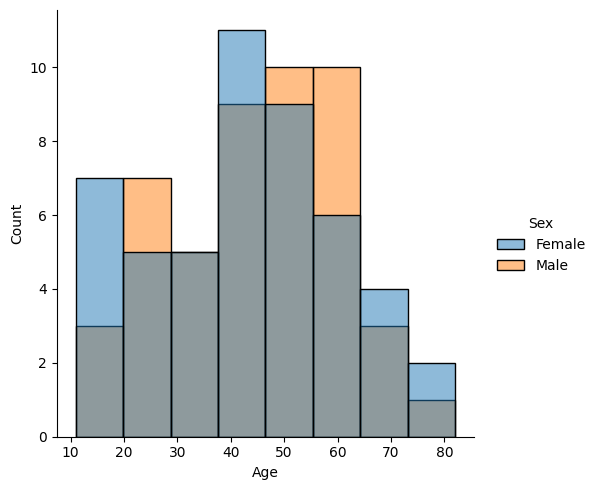

In [94]:
sns.displot(df, x="Age", hue="Sex") 

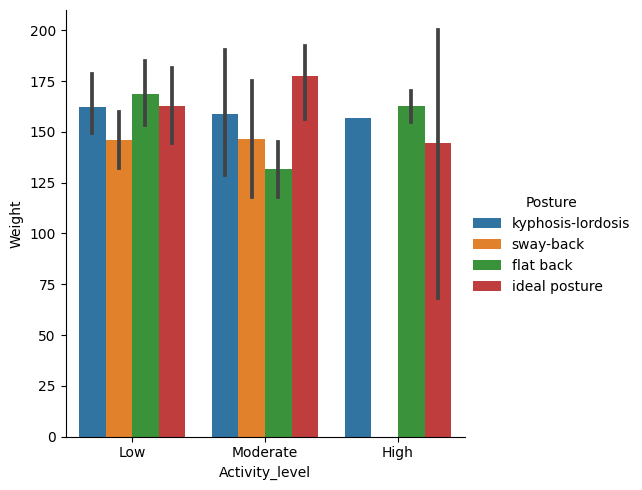

In [95]:
#The effect of weight and activity level on Posture.
sns.catplot(data=df, kind="bar", x="Activity_level", y="Weight", hue="Posture")

<AxesSubplot: xlabel='Age', ylabel='Count'>

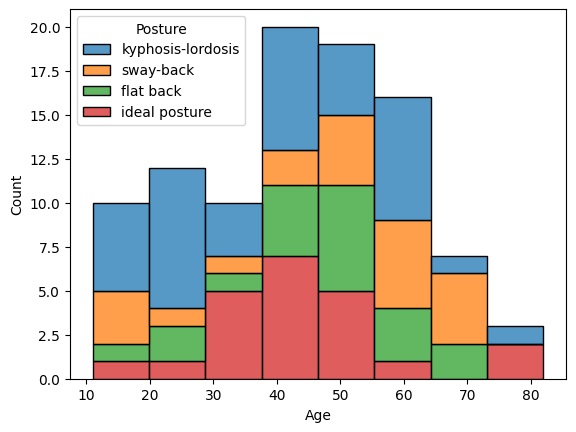

In [96]:
#Relationship between age and Posture
sns.histplot(data=df, x="Age", hue="Posture", multiple="stack")

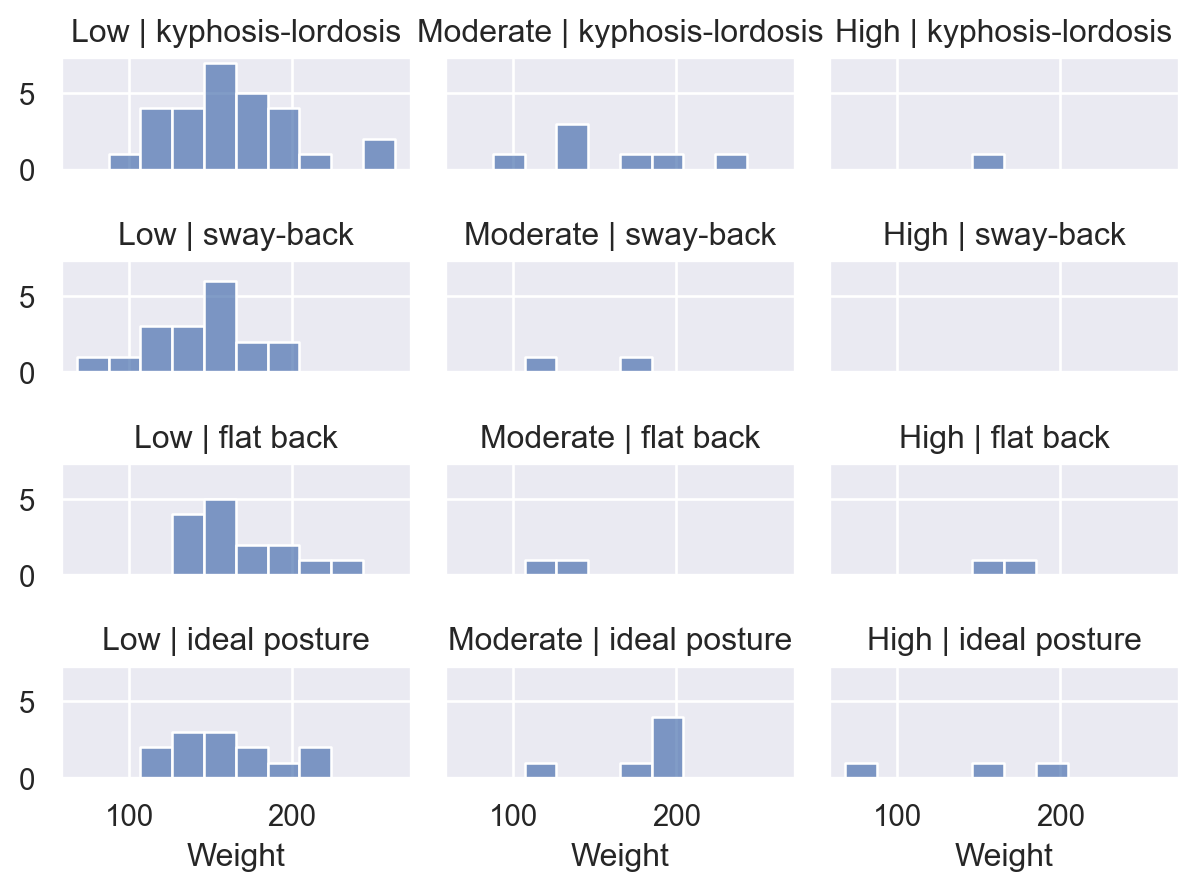

In [97]:
#The effect of height and activity level on Posture.
so.Plot(df, x="Weight").facet(col="Activity_level", row="Posture").add(so.Bars(), so.Hist())

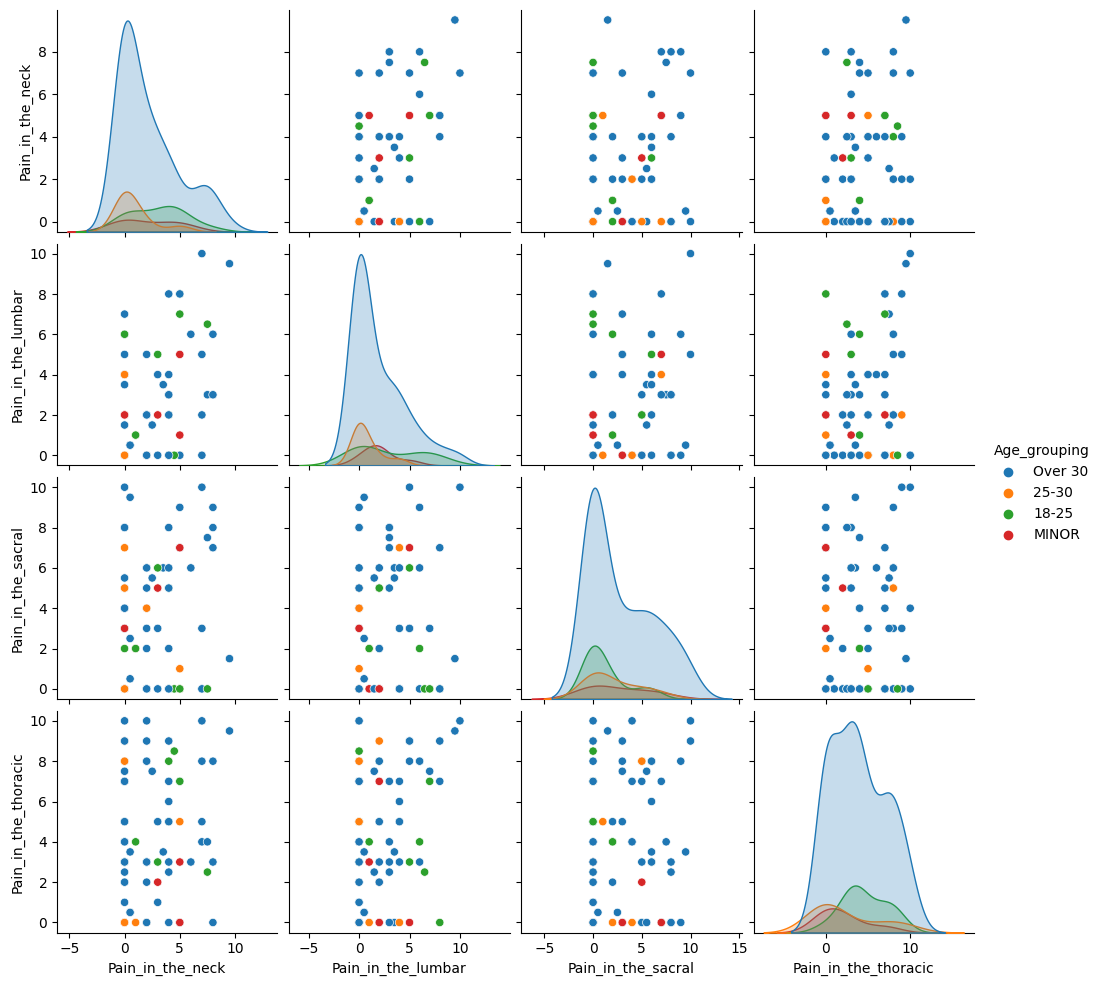

In [98]:
#Relationship between Age and Pain
sns.pairplot(df, x_vars=['Pain_in_the_neck','Pain_in_the_lumbar','Pain_in_the_sacral','Pain_in_the_thoracic'],
             y_vars=['Pain_in_the_neck','Pain_in_the_lumbar','Pain_in_the_sacral','Pain_in_the_thoracic'],
             hue="Age_grouping")

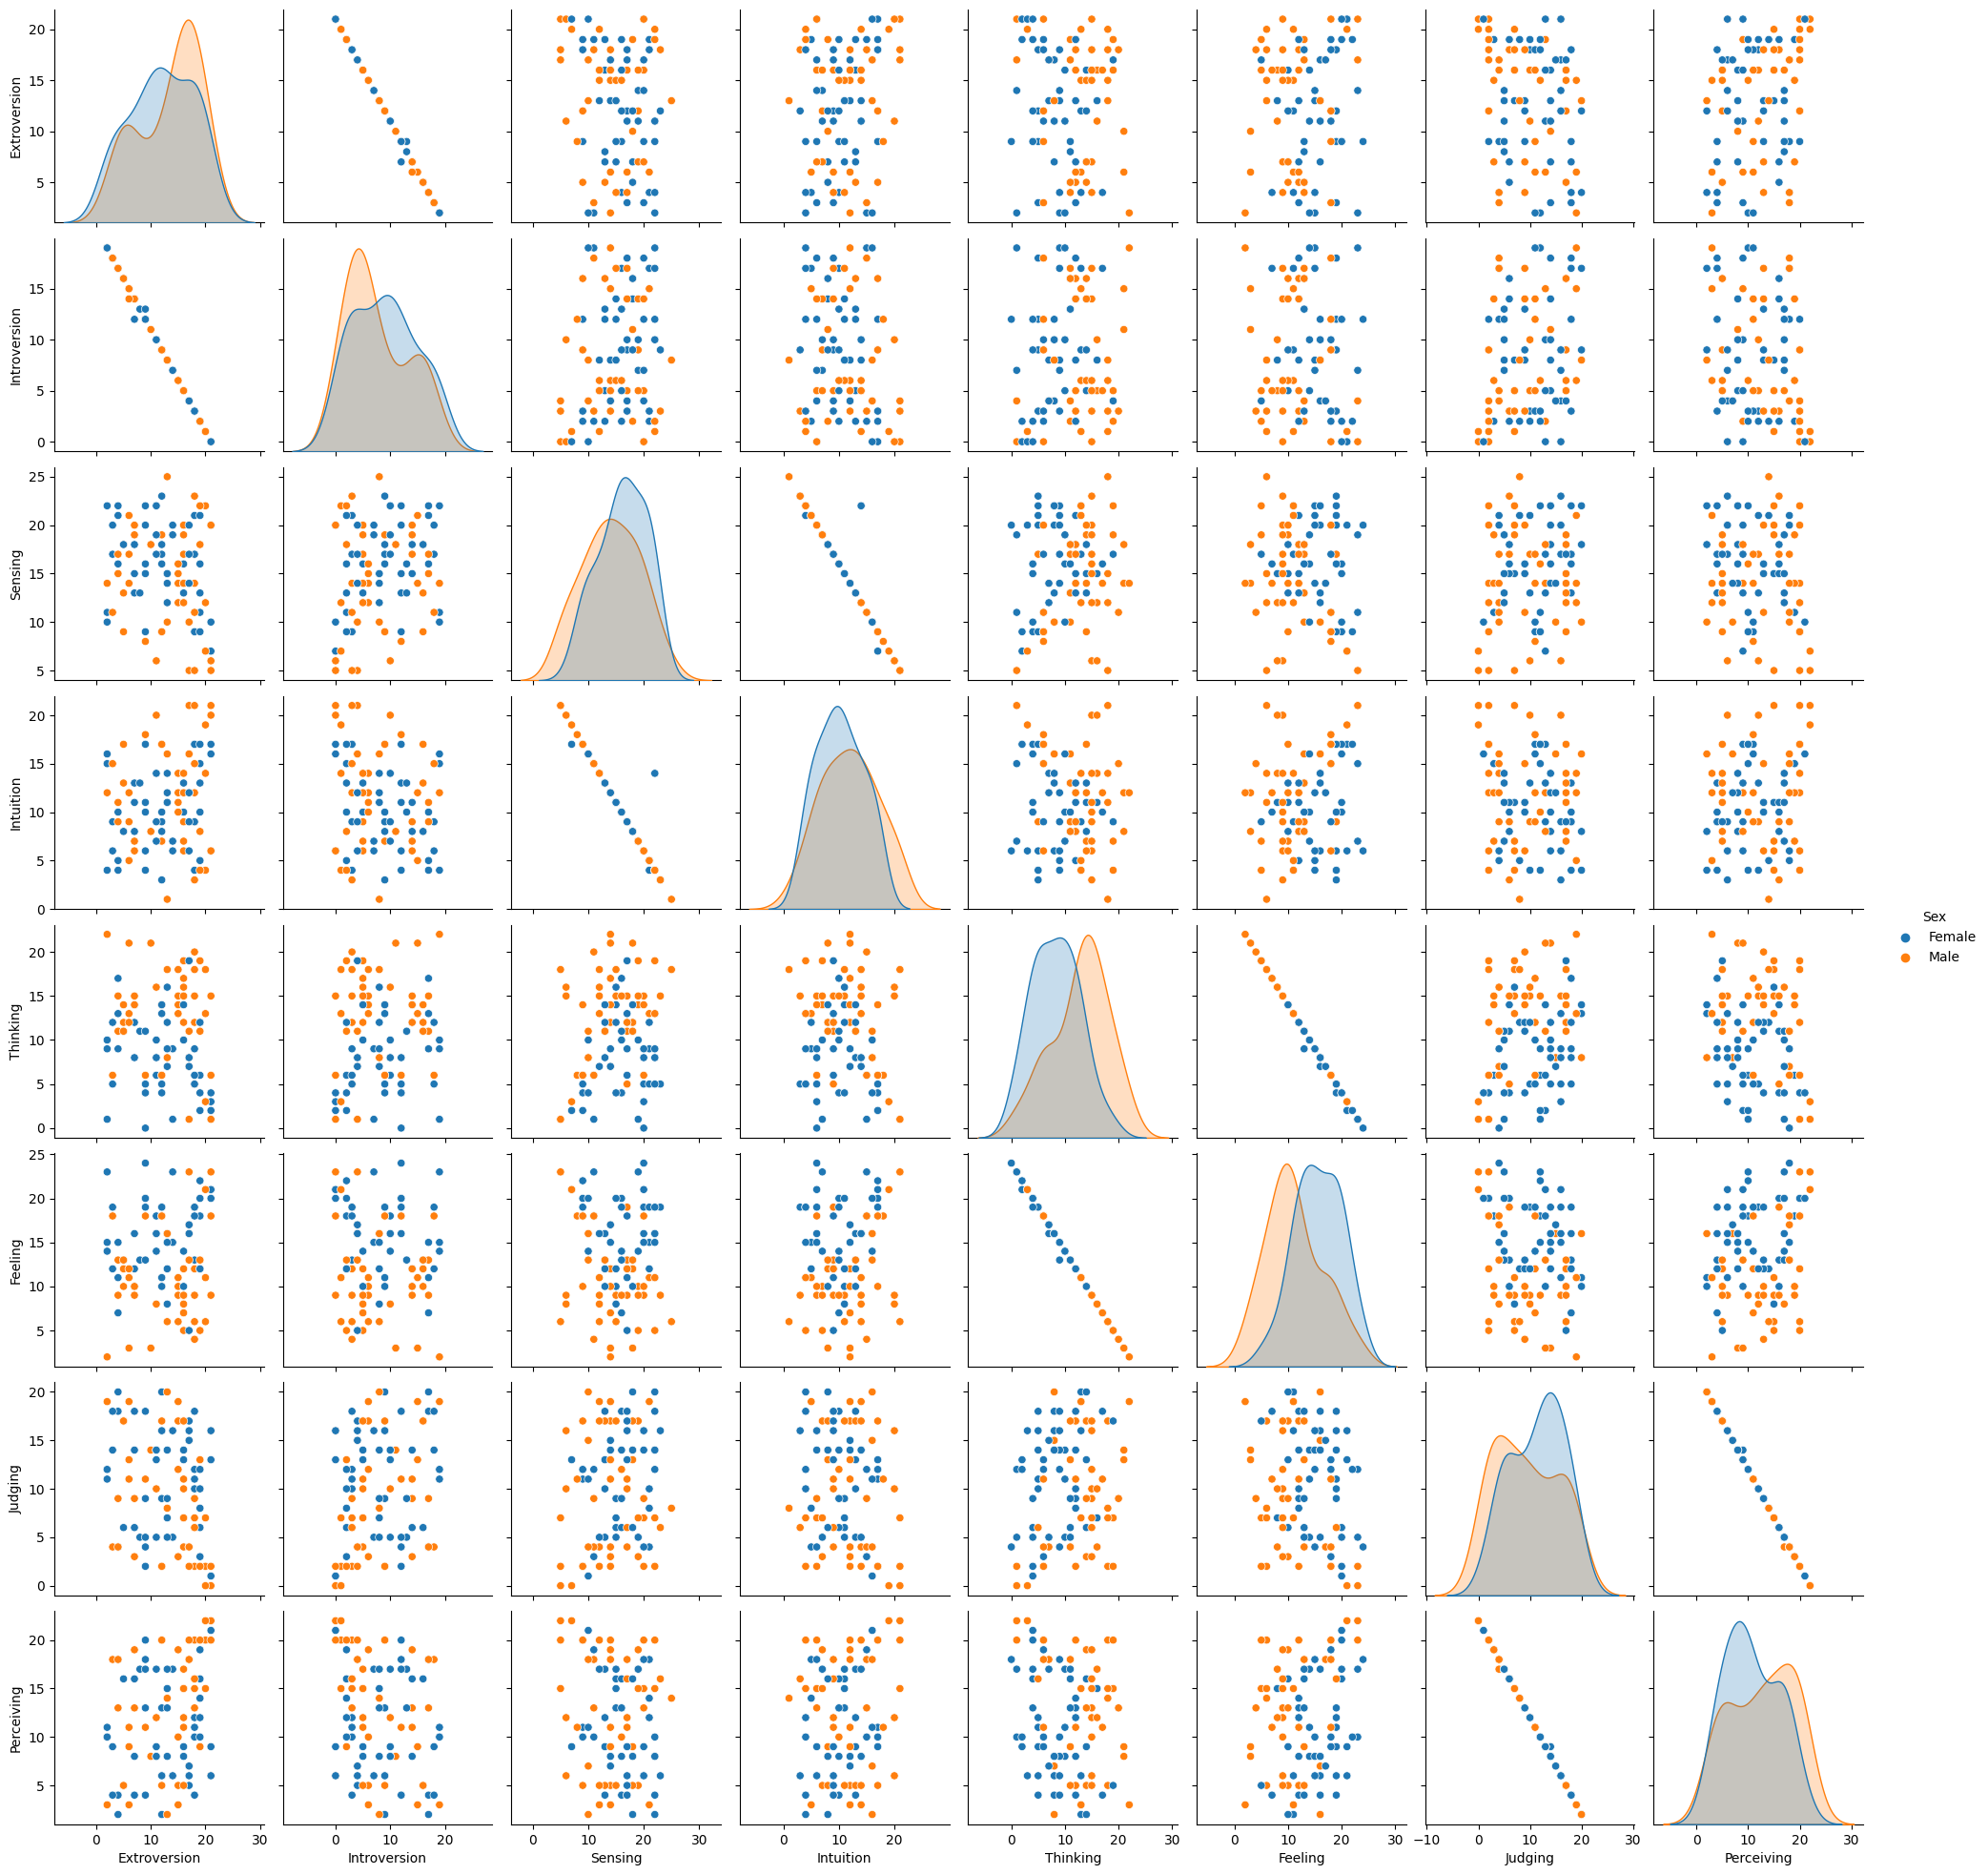

In [99]:
#Relationship between Gender and Emotions
sns.pairplot(df, x_vars=['Extroversion','Introversion','Sensing','Intuition','Thinking','Feeling','Judging','Perceiving'],
             y_vars=['Extroversion','Introversion','Sensing','Intuition','Thinking','Feeling','Judging','Perceiving'],
             hue="Sex")

<AxesSubplot: >

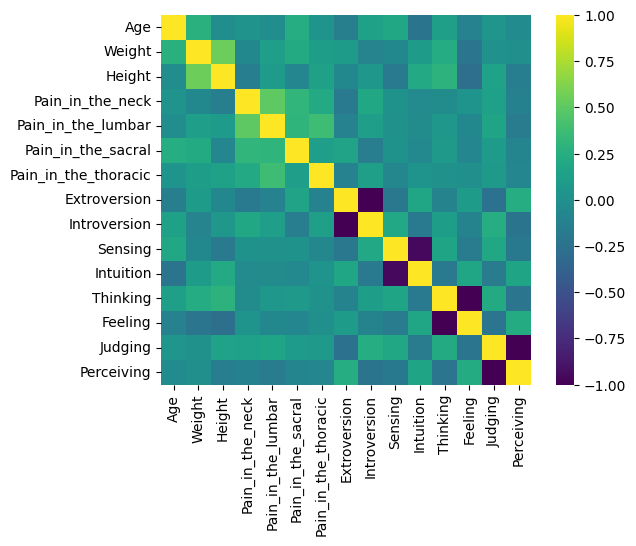

In [101]:
#Correlation Plot
#Correlation between Posture and Personality Trait
# List of columns that contain continuous variables
continuous_variables= ['Age','Weight','Height','Pain_in_the_neck','Pain_in_the_lumbar','Pain_in_the_sacral',
                         'Pain_in_the_thoracic','Extroversion','Introversion','Sensing','Intuition','Thinking',
                         'Feeling','Judging','Perceiving']

# Creating a subset dataframe only the columns of the continous variables
data_cont = df[continuous_variables] 

# Create a pearson correlation
data_corr = data_cont.corr(method='pearson')

# Build the Heatmap
sns.heatmap(data_corr, vmin=-1, vmax=1, square=True, cmap='viridis')